# Random Forest Algorithm

- Regression and classification problems.
- Input dataset broken into batches.
- Individual trees trained on different batch each.
- Training instance passed as input to all trained trees.
- Voting/Bagging for prediction done.
- Majority vote wins and is the output. 

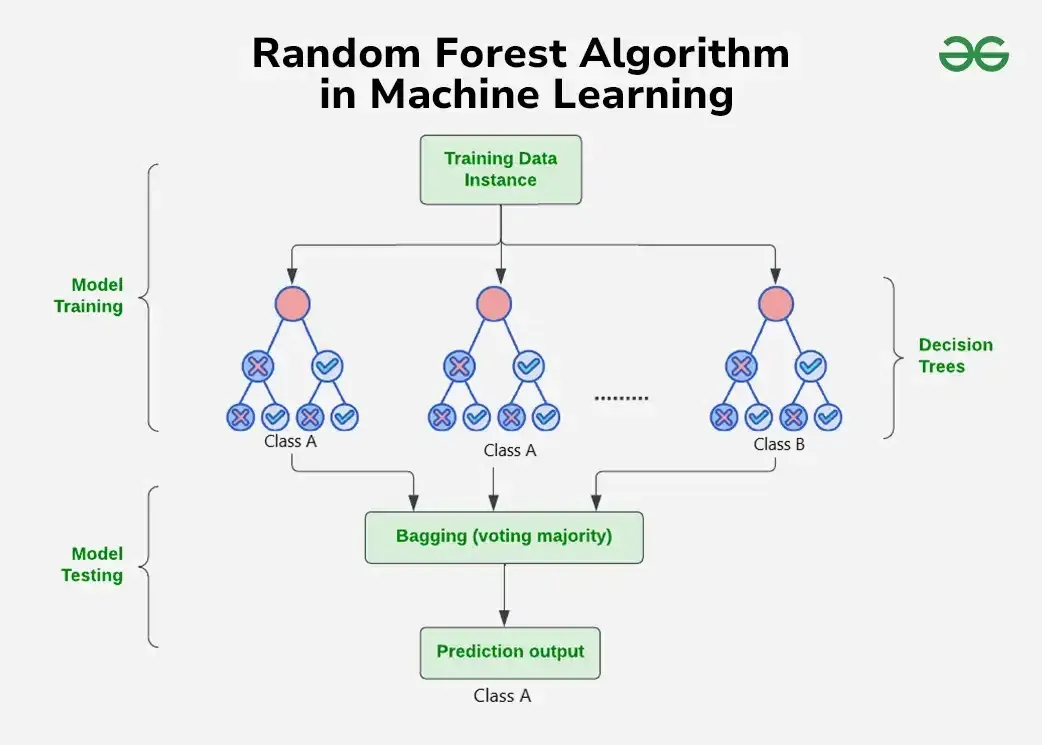

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import seaborn as sns

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

label for image at index 90: 1
image at index 90


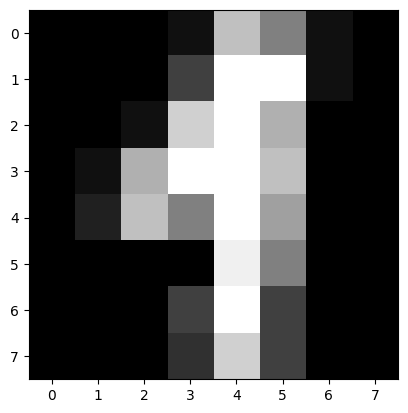

In [9]:
plt.gray()
plt.imshow(digits.images[90])
print("label for image at index 90: {}".format(digits.target[90]))
print("image at index 90")


In [19]:
# creating dataframe based on dir contents

df = pd.DataFrame(digits.data)
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
# defining features and target vars
X = df.drop(["target"], axis=1) # independent variable --> features
y = df["target"]                # dependent variable ----> target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [26]:
# model training

model = RandomForestClassifier()
model.fit(X_train, y_train)

# by default it is using 100 estimator trees. 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
print("accuracy - 100 trees: ",model.score(X_test, y_test)) # 96.48% accuracy

accuracy - 100 trees:  0.9648148148148148


In [29]:
# training a random forest with 10 trees(estimators)

model_10_estimators = RandomForestClassifier(n_estimators=10)
model_10_estimators.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
print("accuracy - 10 trees: ", model_10_estimators.score(X_test, y_test)) # 93% accuracy for model with 10 estimators

accuracy - 10 trees:  0.9351851851851852


[Text(0.3876284246575342, 0.9583333333333334, 'x[21] <= 0.5\ngini = 0.899\nsamples = 801\nvalue = [118.0, 111.0, 131.0, 132.0, 135.0, 137.0, 132.0, 107.0\n132.0, 122.0]'),
 Text(0.1252853881278539, 0.875, 'x[61] <= 8.5\ngini = 0.727\nsamples = 221\nvalue = [0.0, 21.0, 39.0, 13.0, 26.0, 119.0, 126.0, 1.0, 2.0\n0.0]'),
 Text(0.25645690639269403, 0.9166666666666667, 'True  '),
 Text(0.06963470319634703, 0.7916666666666666, 'x[10] <= 12.5\ngini = 0.494\nsamples = 99\nvalue = [0, 5, 3, 9, 22, 110, 9, 1, 0, 0]'),
 Text(0.04337899543378995, 0.7083333333333334, 'x[13] <= 1.5\ngini = 0.662\nsamples = 31\nvalue = [0.0, 3.0, 0.0, 1.0, 22.0, 7.0, 9.0, 1.0, 0.0, 0.0]'),
 Text(0.0319634703196347, 0.625, 'x[33] <= 7.5\ngini = 0.532\nsamples = 24\nvalue = [0, 2, 0, 0, 22, 2, 9, 0, 0, 0]'),
 Text(0.0273972602739726, 0.5416666666666666, 'x[54] <= 1.5\ngini = 0.655\nsamples = 15\nvalue = [0, 2, 0, 0, 7, 2, 9, 0, 0, 0]'),
 Text(0.0228310502283105, 0.4583333333333333, 'x[41] <= 5.5\ngini = 0.639\nsamples =

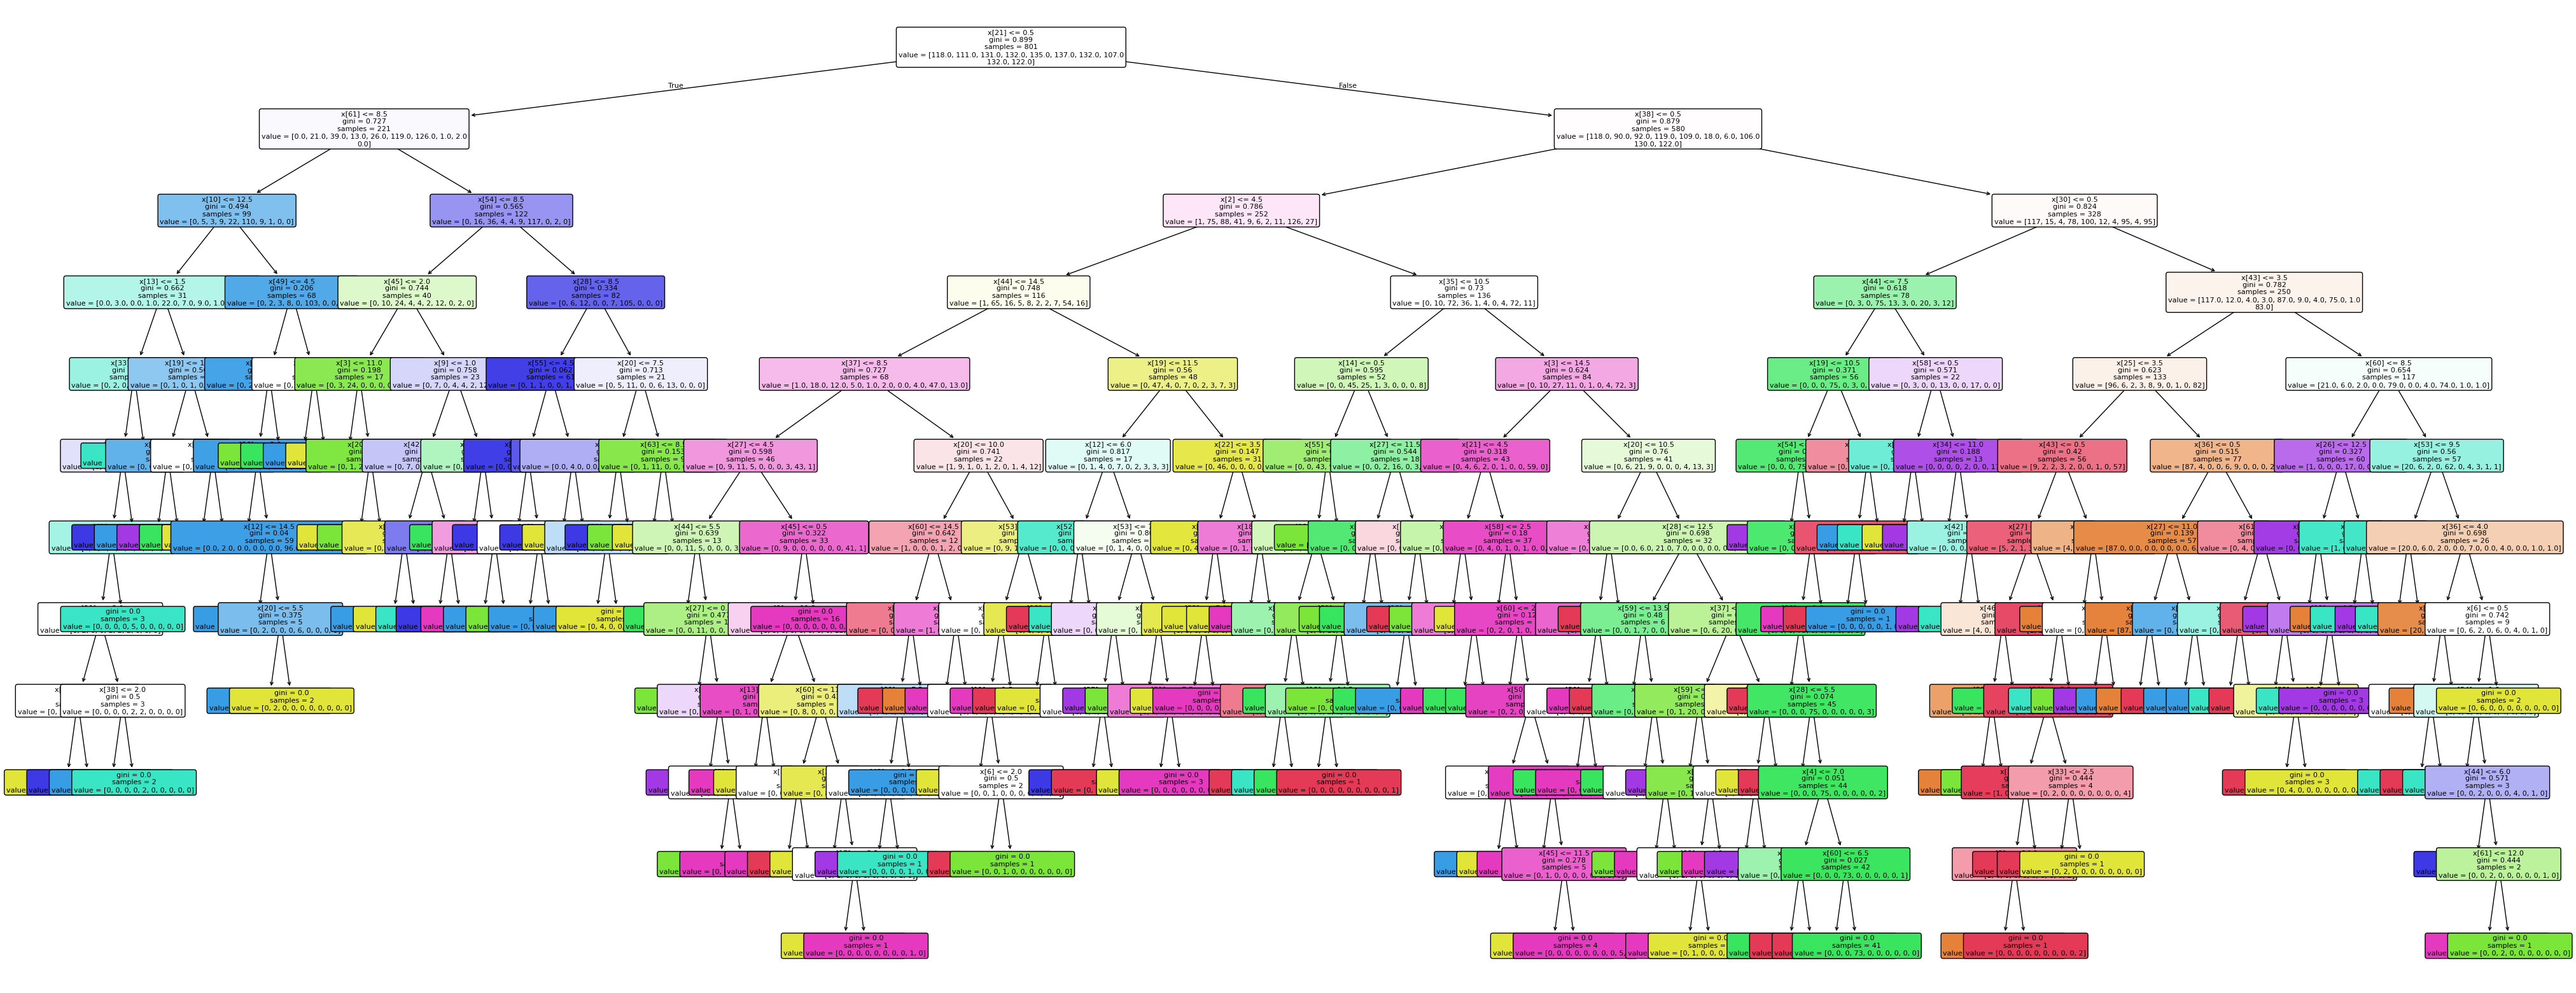

In [49]:
# visualizing trees from the 10 tree classifier

individual_trees_10tree = model_10_estimators.estimators_[0]
figure = plt.figure(figsize=(50,20))
plot_tree(individual_trees_10tree, fontsize=8, rounded=True, filled=True)

[Text(0.3614579870345745, 0.9642857142857143, 'x[61] <= 0.5\ngini = 0.9\nsamples = 789\nvalue = [121, 129, 119, 115, 114, 140, 133, 132, 119, 135]'),
 Text(0.17819148936170212, 0.8928571428571429, 'x[25] <= 1.5\ngini = 0.752\nsamples = 214\nvalue = [10, 18, 2, 5, 72, 72, 2, 132, 20, 7]'),
 Text(0.2698247381981383, 0.9285714285714286, 'True  '),
 Text(0.10571808510638298, 0.8214285714285714, 'x[53] <= 1.5\ngini = 0.547\nsamples = 113\nvalue = [0, 14, 2, 5, 6, 14, 0, 117, 19, 2]'),
 Text(0.05452127659574468, 0.75, 'x[19] <= 10.0\ngini = 0.4\nsamples = 92\nvalue = [0, 11, 0, 1, 0, 7, 0, 112, 16, 0]'),
 Text(0.03723404255319149, 0.6785714285714286, 'x[38] <= 0.5\ngini = 0.162\nsamples = 70\nvalue = [0, 0, 0, 1, 0, 3, 0, 106, 6, 0]'),
 Text(0.031914893617021274, 0.6071428571428571, 'x[12] <= 15.5\ngini = 0.594\nsamples = 14\nvalue = [0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 13.0, 6.0, 0.0]'),
 Text(0.026595744680851064, 0.5357142857142857, 'x[9] <= 3.5\ngini = 0.53\nsamples = 13\nvalue = [0, 0, 0

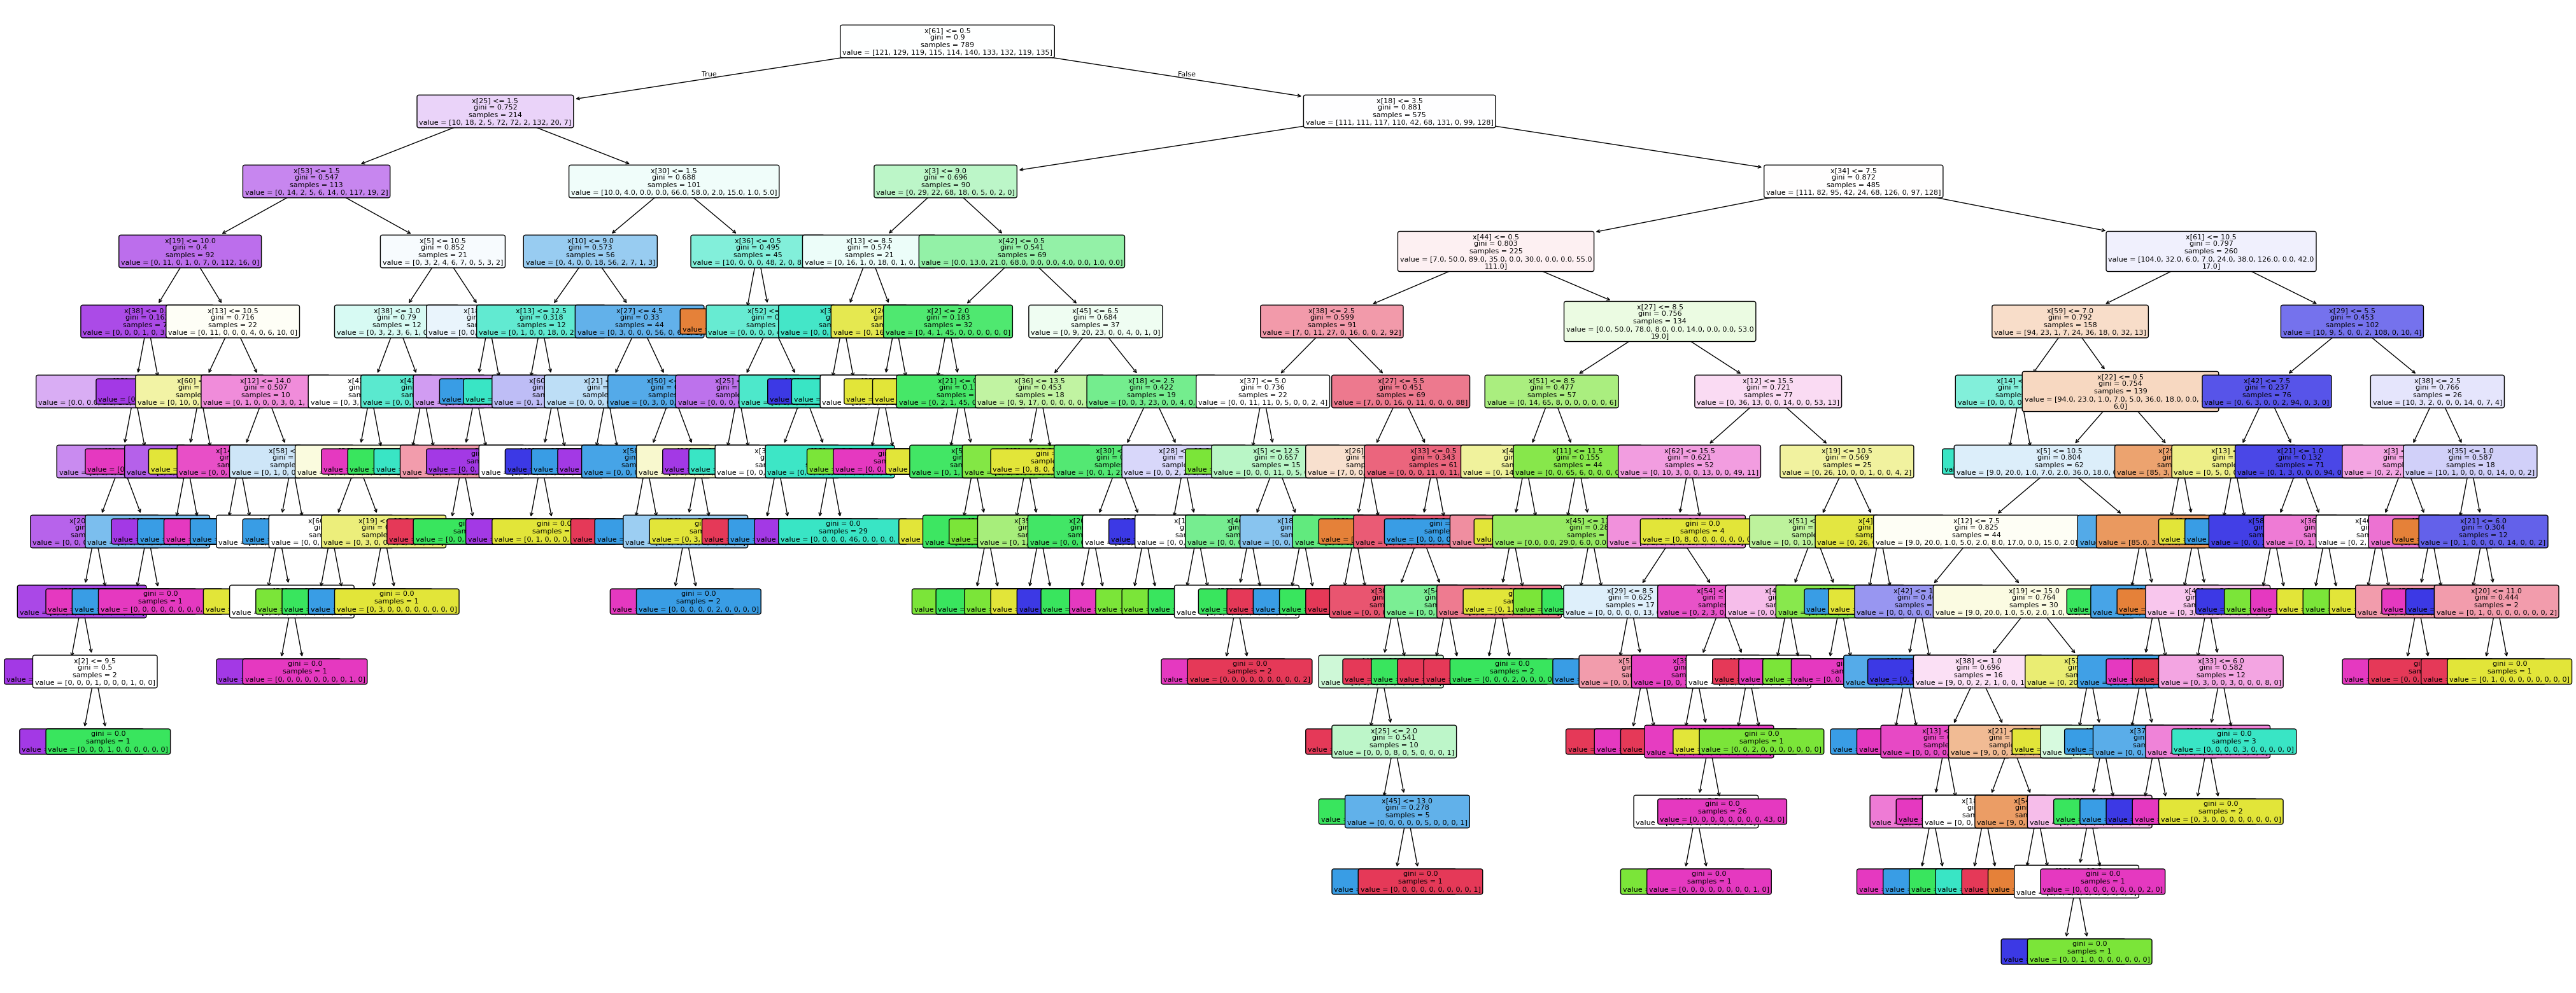

In [51]:
# visualizing trees from the 100 tree classifier

individual_trees_100tree = model.estimators_[0]
figure = plt.figure(figsize=(50,20))
plot_tree(individual_trees_100tree, fontsize=8, rounded=True, filled=True)

In [60]:
# confusion matrix for the 10 tree classifier

predictions_10trees = model_10_estimators.predict(X_test)
cm_10trees = confusion_matrix(y_test, predictions_10trees)
cm_10trees

array([[50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 52,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  1, 49,  0,  0,  0,  0,  2,  3],
       [ 0,  1,  0,  0, 48,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 58,  0,  0],
       [ 1,  4,  2,  0,  0,  1,  0,  0, 41,  1],
       [ 0,  0,  0,  1,  1,  2,  0,  3,  1, 46]])

Text(50.722222222222214, 0.5, 'True')

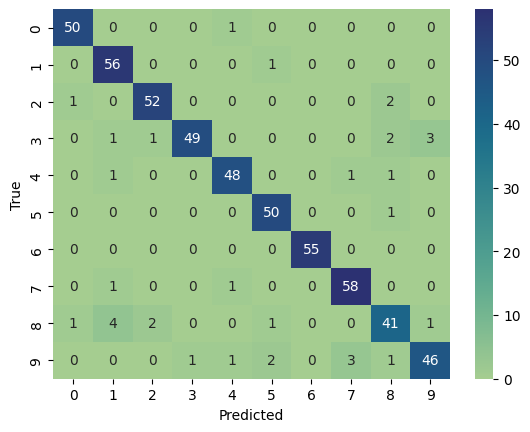

In [69]:
sns.heatmap(cm_10trees, annot=True, cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('True')

In [65]:
# confusion matrix for the 100 tree classifier

predictions_100trees = model.predict(X_test)
cm_100trees = confusion_matrix(y_test, predictions_100trees)
cm_100trees

array([[50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  1],
       [ 0,  2,  1,  0,  1,  1,  0,  0, 44,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  2,  0, 50]])

Text(50.722222222222214, 0.5, 'True')

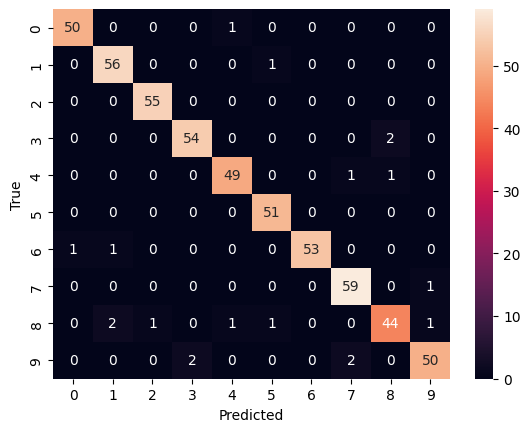

In [68]:
sns.heatmap(cm_100trees, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')